
<img src="images/digits.png">
______________________________________________________________________________________________________________________________

# <font color='green'>Recognizing Handwritten Digits with Python</font>

 ### Eugenio Grant 
_This notebook is a rip-off of several sources & based on concepts from A. Geron ML Book and AI Course from Cenfotec_
______________________________________________________________________________________________________________________________

In [1]:
# Firt we need to import the needed libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# We read the data (check if a new version is available)
mnist = pd.read_csv("data/mnist_data.csv")

In [6]:
#Check how many rows and columns
mnist.shape  

(70000, 786)

In [7]:
mnist.head(5)

,id,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


_So the dataset has 70,000 records, each corresponds to a digit, the target variable defines the digit. Then you have 784 pixels, each has a shade of gray from 0 to 255, that define a handwritten number like the example below_

<img src="images/8_example.png">

_So we actually have 70,000 images and what we want to do is train a model to classify digits_

# <font color='green'>1. Classification using KNN</font>

For the oficial documentation go to: https://scikit-learn.org/stable/modules/neighbors.html#classification

<img src="images/knn.jpg">

In [8]:
# NB: So for this Analysis we're keeping only 10K records for time constranints
mnist = mnist.sample(n = 10000)
mnist.shape

(10000, 786)

In [9]:
# Import sklearn libraries
from sklearn.model_selection import train_test_split       # This to split into train and test 
from sklearn.neighbors       import KNeighborsClassifier   # KNN classifier
from sklearn.metrics         import classification_report  # Classification report
#from sklearn.metrics         import accuracy_score

In [10]:
#from sklearn import datasets

In [11]:
# Slice our dataset and convert target to an array
y = mnist.iloc[:,1:2]
y = y.to_numpy()
y.shape

(10000, 1)

In [12]:
# Slice our dataset and convert image mapping to an array
X = mnist.iloc[:,2:786]
X = X.to_numpy()
X.shape

(10000, 784)

In [16]:
# Use a random number and try to guess the number
rand_num = X[9999]
rand_num = rand_num.reshape(28, 28)
example = pd.DataFrame(rand_num)
example.to_csv("guess.csv")  # Open the csv and try to guess the number

_We're pretty good at recognizing patterns, how can we make the computer "automate" this process?_

In [17]:
# Define a funtion to plot a number
def plot_digit(digit):
    plt.imshow(digit, cmap = 'binary')
    plt.grid(True)
    #plt.yticks(np.arange(0, 28, step=1))
    #plt.xticks(np.arange(0, 28, step=1))
    #plt.grid(which='minor')

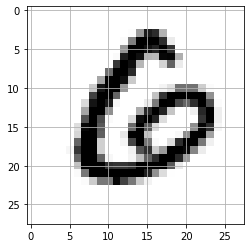

In [18]:
plot_digit(rand_num)

In [19]:
# Training and testing split
# First we're doing 75% for training and 25% for testing purposes
# For reproducibility keep random state as 80
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=80)

<img src="images/split.jpg">

In [20]:
# Let's confirm our datasets
print("Training datast size: {}".format(len(X_train)))
print("Training datast size: {}".format(len(X_test)))

Training datast size: 7500
Training datast size: 2500


In [26]:
# This function returns a flattened one-dimensional array. A copy is made only if needed. 
# The returned array will have the same type as that of the input array. The function takes one parameter.

y_train = np.ravel(y_train)   # Convert to row 1d format
y_test  = np.ravel(y_test)    # Convert to row 1d format

In [27]:
# let´s prepare our model, we start with k = 2
model = KNeighborsClassifier(n_neighbors=2)
model  # Print to check our parameters

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [29]:
# Fitting the model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [30]:
# Predict labels for the test set (took around 10 minutes for whole dataset)
y_pred = model.predict(X_test)

_Score: Returns the mean accuracy on the given test data and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted._


In [31]:
# Accuracy classification score
score = model.score(X_test, y_test)

In [32]:
print("Accuracy=%.2f%%" % (score * 100))

Accuracy=93.48%


In [22]:
y_pred

array([8, 3, 1, ..., 4, 6, 0], dtype=int64)

In [24]:
# We can save our predictions to a dataframe and csv
pred = pd.DataFrame(y_pred)
pred.to_csv("predictions.csv")

In [25]:
true = pd.DataFrame(y_test)
true.to_csv("y_test.csv")

In [33]:
# Why is our model failing?
y_pred[2493]
rand_num = X[2493]
rand_num = rand_num.reshape(28, 28)
example = pd.DataFrame(rand_num)
example.to_csv("wrong.csv")  # Open the csv to see what's going on

In [34]:
#y_pred & y_test
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[239,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0, 260,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   5, 220,   1,   1,   0,   0,   3,   0,   0],
       [  1,   4,   3, 263,   0,   3,   0,   1,   0,   2],
       [  1,   3,   0,   0, 239,   0,   2,   0,   0,   2],
       [  1,   1,   0,  11,   3, 225,   3,   0,   0,   0],
       [  5,   1,   0,   0,   0,   1, 239,   0,   1,   0],
       [  1,   5,   3,   0,   7,   0,   0, 253,   0,   4],
       [  0,   6,   1,   7,   5,  11,   3,   2, 192,   4],
       [  1,   1,   1,   4,  14,   1,   0,  19,   0, 207]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report

__________________________________________________________________________________________________________________________
### A Classification report is used to measure the quality of predictions from a classification algorithm.

There are four ways to check if the predictions are right or wrong:

* TN / True Negative: when a case was negative and predicted negative
* TP / True Positive: when a case was positive and predicted positive
* FN / False Negative: when a case was positive but predicted negative
* FP / False Positive: when a case was negative but predicted positive


##### <font color='blue'>1. Precision – What percent of your predictions were correct?</font>  
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

TP – True Positives
FP – False Positives

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

##### <font color='blue'>2. Recall – What percent of the positive cases did you catch?</font>  
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

FN – False Negatives

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

##### <font color='blue'>3. F1 score – What percent of positive predictions were correct?</font>  
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)


References: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       241
           1       0.91      1.00      0.95       260
           2       0.96      0.95      0.96       232
           3       0.92      0.95      0.93       277
           4       0.89      0.97      0.92       247
           5       0.93      0.92      0.93       244
           6       0.97      0.97      0.97       247
           7       0.91      0.93      0.92       273
           8       0.99      0.83      0.91       231
           9       0.95      0.83      0.89       248

    accuracy                           0.93      2500
   macro avg       0.94      0.93      0.93      2500
weighted avg       0.94      0.93      0.93      2500



In [38]:
from random import seed
from random import randint

# Test random number generation
for i in range(0,10):
    value = randint(0, y_test.size)
    print(value)

724
2436
1215
2247
538
680
997
2108
2065
1804


Random value chosen: 560
Model predicts the digit is: [0]
Test data says it's a: 0


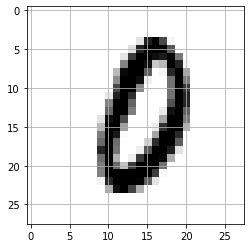

In [78]:
# Test our model with a random digit
value = randint(0, y_test.size)
#value = 2493
image = X_test[value]
val = y_test[value]
image = image.reshape(28, 28)
plot_digit(image)
image = image.reshape(1, -1)
print("Random value chosen: {}".format(value))
pred = model.predict(image)
print("Model predicts the digit is: {}".format(pred))
print("Test data says it's a: {}".format(val))
